In [164]:
# coding=utf-8
# Author: Rion B Correia
# Date: Aug 06, 2019
#
# Description: Plots the linear relationship between FPKM and mean(Fert-Rate)
#
# Instructions:
#
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors
mpl.rcParams['font.family'] = 'Helvetica'
mpl.rcParams['mathtext.fontset'] = 'cm'
import matplotlib.ticker as mtick
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot

In [3]:
def value_to_color(x, cmap, norm):
    rgb = cmap(norm(x))[:3]
    return colors.rgb2hex(rgb)


def calc_control_mean_std_fert_rate(x):
    fertrate = x['hatched'] / x['eggs']
    return pd.Series({'mean fert-rate': fertrate.mean(), 'std fert-rate': fertrate.std()})

In [4]:
# Load genes
df = pd.read_csv('../02-core_genes/results/pipeline-core/DM_meiotic_genes.csv', index_col=0, usecols=['id_gene', 'gene'])

# Load Screened data
dfs = pd.read_csv('data/core_DM_screened_2020-10-21.csv', index_col=0)

# Load Control data
dfc = pd.read_csv('data/screened_DM_controls.csv', index_col=0)
dfc = dfc.groupby(dfc.index).apply(calc_control_mean_std_fert_rate)

# Load FPKM data
dfFPKM = pd.read_csv('../02-core_genes/results/FPKM/DM/DM-FPKM-spermatocyte.csv.gz', index_col=0, usecols=['id_gene', 'FPKM'])

dfs_only = dfs.loc[~dfs['FT1 eggs'].isnull(), :]

status_cats = ['Screened', 'To be crossed', 'Pending', 'Reorder']
dfs['Status'] = pd.Categorical(dfs['Status'], categories=status_cats, ordered=True)
df['Status'] = dfs['Status']

cols = ['FT1 eggs', 'FT1 hatched', 'FT2 eggs', 'FT2 hatched', 'FT3 eggs', 'FT3 hatched', 'FT4 eggs', 'FT4 hatched']
df[cols] = dfs_only[cols]

# Only plot screened genes
df = df.loc[df['Status'] == 'Screened', :]

# Calculations
df['total-eggs'] = 0
df['total-hatched'] = 0
for ft in range(1, 5):

    col_eggs = 'FT{:d} eggs'.format(ft)
    col_hatched = 'FT{:d} hatched'.format(ft)
    col_fertate = 'FT{:d} fert-rate'.format(ft)
    df[col_fertate] = df[col_hatched] / df[col_eggs]
    df['total-eggs'] += df[col_eggs]
    df['total-hatched'] += df[col_hatched]

# Mean/SD
df['mean fert-rate'] = df[['FT1 fert-rate', 'FT2 fert-rate', 'FT3 fert-rate', 'FT4 fert-rate']].mean(axis=1)
df['std fert-rate'] = df[['FT1 fert-rate', 'FT2 fert-rate', 'FT3 fert-rate', 'FT4 fert-rate']].std(axis=1)

# FPKM
df['FPKM'] = dfFPKM['FPKM']
df['logFPKM'] = df['FPKM'].apply(lambda x: np.log2(x + 1))

maxfpkm, minfpkm = df['logFPKM'].max(), df['logFPKM'].min()


In [5]:
df

,gene,Status,FT1 eggs,FT1 hatched,FT2 eggs,FT2 hatched,FT3 eggs,FT3 hatched,FT4 eggs,FT4 hatched,total-eggs,total-hatched,FT1 fert-rate,FT2 fert-rate,FT3 fert-rate,FT4 fert-rate,mean fert-rate,std fert-rate,FPKM,logFPKM
id_gene,,,,,,,,,,,,,,,,,,,,
FBgn0000079,Amy-p,Screened,18.0,18.0,16.0,14.0,25.0,20.0,27.0,27.0,86.0,79.0,1.000000,0.875000,0.800000,1.000000,0.918750,0.098689,5.209883,2.634566
FBgn0000108,Appl,Screened,25.0,15.0,26.0,12.0,18.0,18.0,23.0,23.0,92.0,68.0,0.600000,0.461538,1.000000,1.000000,0.765385,0.276745,0.270433,0.345321
FBgn0000119,arr,Screened,25.0,24.0,23.0,23.0,25.0,25.0,21.0,21.0,94.0,93.0,0.960000,1.000000,1.000000,1.000000,0.990000,0.020000,4.756445,2.525178
FBgn0000139,ash2,Screened,25.0,24.0,21.0,15.0,38.0,38.0,27.0,24.0,111.0,101.0,0.960000,0.714286,1.000000,0.888889,0.890794,0.126325,5.317165,2.659277
FBgn0000146,aub,Screened,28.0,28.0,26.0,19.0,29.0,29.0,24.0,22.0,107.0,98.0,1.000000,0.730769,1.000000,0.916667,0.911859,0.126957,1.336846,1.224563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBgn0284220,Top2,Screened,35.0,0.0,26.0,0.0,28.0,0.0,23.0,0.0,112.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.925433,2.300251
FBgn0284221,Sema5c,Screened,28.0,26.0,25.0,21.0,30.0,26.0,17.0,13.0,100.0,86.0,0.928571,0.840000,0.866667,0.764706,0.849986,0.067888,1.458158,1.297578
FBgn0284243,betaTub56D,Screened,35.0,0.0,29.0,0.0,25.0,0.0,29.0,0.0,118.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.907982,6.302099


In [6]:
import seaborn as sns

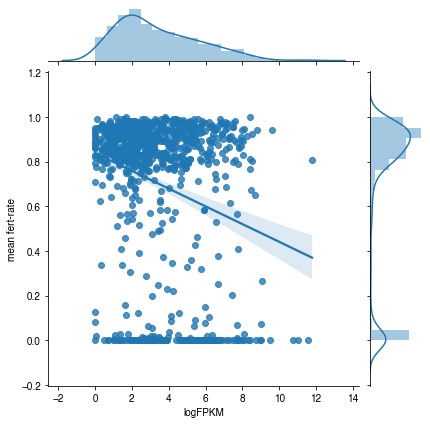

In [13]:
sns.color_palette("tab10")

sns.jointplot(x='logFPKM', y='mean fert-rate', data=df, kind='reg')

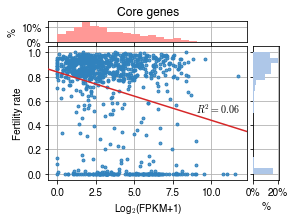

In [183]:

fig = plt.figure(figsize=(4, 3))

gs = gridspec.GridSpec(nrows=15, ncols=15)
ax = plt.subplot(gs[2:13, 0:13])
axt = plt.subplot(gs[0:2, 0:13])
axb = plt.subplot(gs[2:13, 13:15])

axt.set_title("Core genes")

# Data
x = df['logFPKM']
y = df['mean fert-rate']

# OLS
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()

# Main
sc = ax.scatter(x=x, y=y, fc='#3182bdcc', ec='#3182bd', s=8, zorder=5)
ax.set_ylabel('Fertility rate')
ax.set_xlabel(r'Log$_2$(FPKM+1)')
ax.grid()

ax.text(x=9, y=0.5, s=r"$R^2={rsquared:.2f}$".format(rsquared=results.rsquared))
abline_plot(model_results=results, color='#d62728', ax=ax, zorder=6) # regression line

# Top
xw = np.ones(shape=len(x)) / len(x)
axt.hist(x, bins=22, color='#ff9896', weights=xw, zorder=5)
#axt.axes.get_xaxis().set_visible(False)
axt.set_xticklabels([])
axt.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
axt.set_ylabel('%')
axt.grid()

# Bottom
yw = np.ones(shape=len(y))/len(y)
axb.hist(y, bins=22, color='#aec7e8', weights=yw, orientation='horizontal', zorder=5)
#axb.axes.get_yaxis().set_visible(False)
axb.set_yticklabels([])
axb.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
axb.set_xlabel('%')
#axb.set_xlim(-0.02,0.2)
axb.grid()

plt.subplots_adjust(left=0.15, right=0.95, bottom=0.05, top=0.90, wspace=0.50, hspace=0.50)
fig.savefig('images/img-linreg-FPKM-fertrate.pdf')